In [33]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pickle 

In [34]:
img = cv2.imread("./phieuTracNghiem/MicrosoftTeams-image.png", 0)

blur = cv2.GaussianBlur(img,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

horizal = thresh
vertical = thresh

scale_height = 20 #Scale này để càng cao thì số dòng dọc xác định sẽ càng nhiều
scale_long = 15

long = int(img.shape[1]/scale_long)
height = int(img.shape[0]/scale_height)

horizalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (long, 1))
horizal = cv2.erode(horizal, horizalStructure, (-1, -1))
horizal = cv2.dilate(horizal, horizalStructure, (-1, -1))

verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, height))
vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))

mask = vertical + horizal

contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [35]:
max = -1
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if cv2.contourArea(cnt) > max:
        x_max, y_max, w_max, h_max = x, y, w, h
        max = cv2.contourArea(cnt)

table = img[y_max:y_max+h_max, x_max:x_max+w_max]

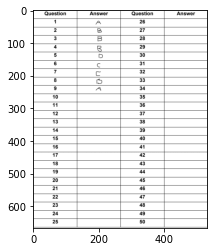

In [36]:
plt.imshow(table, cmap='gray')
plt.show()

In [37]:
cropped_thresh_img = []
cropped_origin_img = []
countours_img = []

NUM_ROWS = 26
START_ROW = 1
for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS)+1:y_max + round((i+1)*h_max/NUM_ROWS)-1, x_max + round(w_max/4)+1:x_max +round(w_max/2)-1]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS) +1:y_max + round((i+1)*h_max/NUM_ROWS)-1, x_max + round(w_max/4)+1:x_max +round(w_max/2)-1]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)


In [38]:
for i in range(START_ROW, NUM_ROWS):
    thresh1 = thresh[y_max + round(i*h_max/NUM_ROWS)+1:y_max + round((i+1)*h_max/NUM_ROWS)-1, x_max + round(3*w_max/4)+1:x_max +round(w_max)-1]
    contours_thresh1, hierarchy_thresh1 = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    origin1 = img[y_max + round(i*h_max/NUM_ROWS) +1:y_max + round((i+1)*h_max/NUM_ROWS)-1, x_max + round(3*w_max/4)+1:x_max +round(w_max)-1]

    cropped_thresh_img.append(thresh1)
    cropped_origin_img.append(origin1)
    countours_img.append(contours_thresh1)

In [39]:
print(len(cropped_origin_img))

50


0


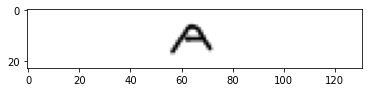

1


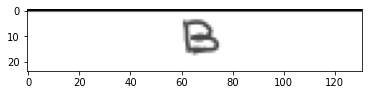

2


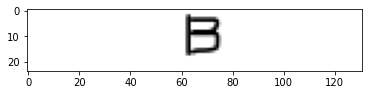

3


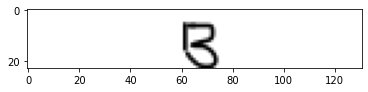

4


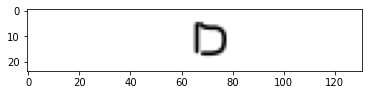

5


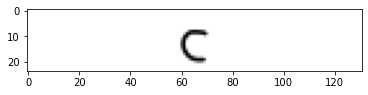

6


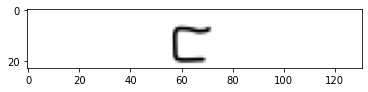

7


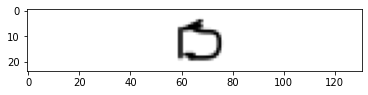

8


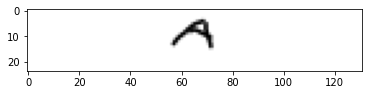

9


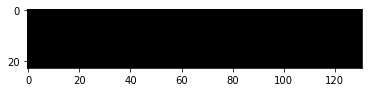

10


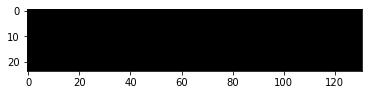

11


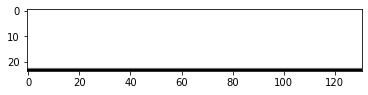

12


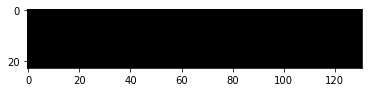

13


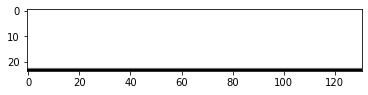

14


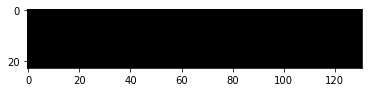

15


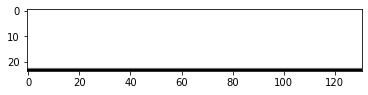

16


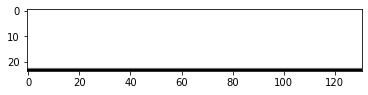

17


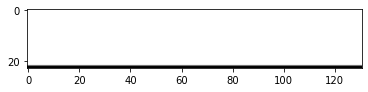

18


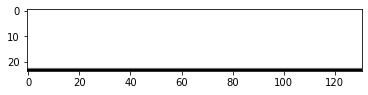

19


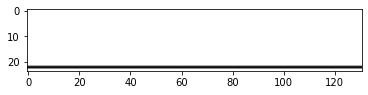

20


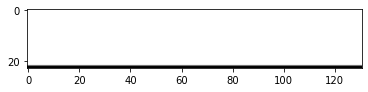

21


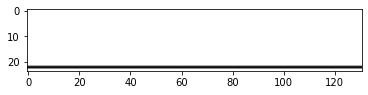

22


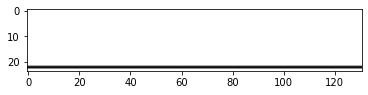

23


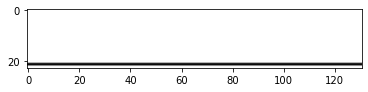

24


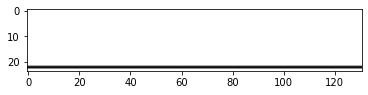

25


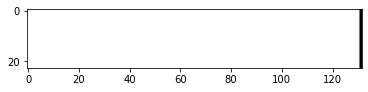

26


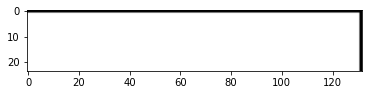

27


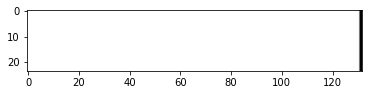

28


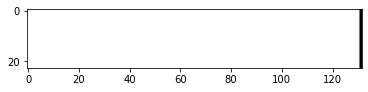

29


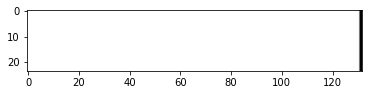

30


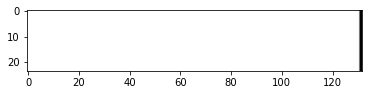

31


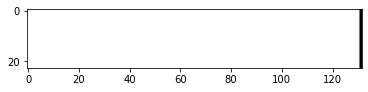

32


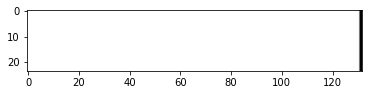

33


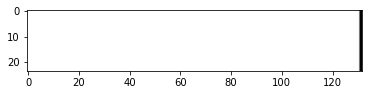

34


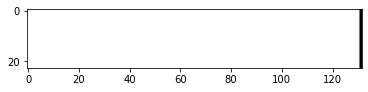

35


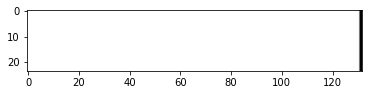

36


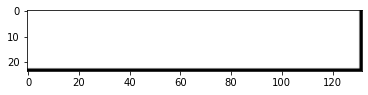

37


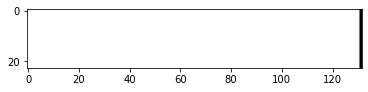

38


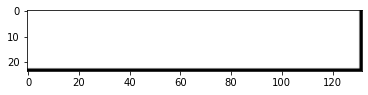

39


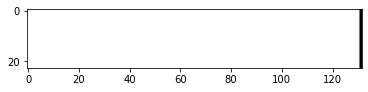

40


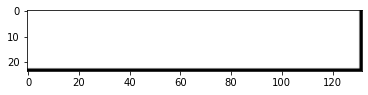

41


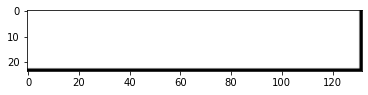

42


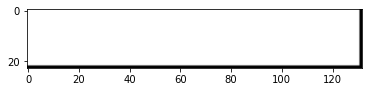

43


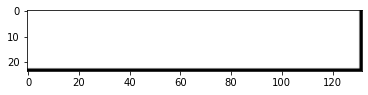

44


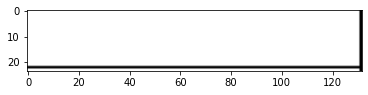

45


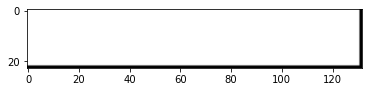

46


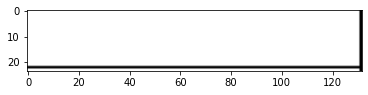

47


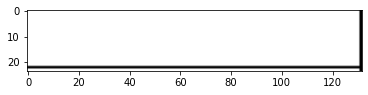

48


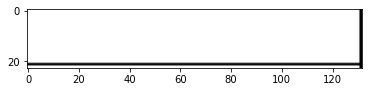

49


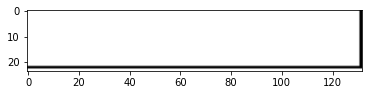

In [40]:
for i in range(len(cropped_origin_img)):
    print(i)
    plt.imshow(cropped_origin_img[i], cmap='gray')
    plt.show()

In [41]:
answer_img = {}
# Creating kernel
kernel = np.ones((2,2), np.uint8)
for i, countour_img in enumerate(countours_img):
    for cnt in countour_img:
        if cv2.contourArea(cnt) > 30:
             x,y,w,h = cv2.boundingRect(cnt)
             if x > cropped_origin_img[i].shape[1]*0.05 and x < cropped_origin_img[i].shape[1]*0.95:
                 answer = cropped_origin_img[i][y-2:y+h+2, x-5:x+w+5]
                 answer = cv2.threshold(answer, 160, 255, cv2.THRESH_BINARY_INV)[1]
                 answer_img[i] = answer

0


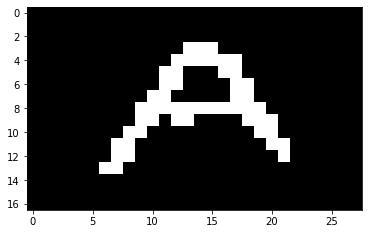

1


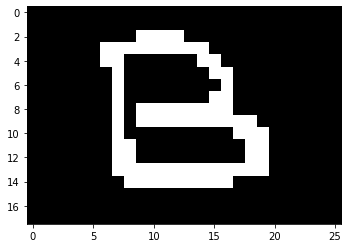

2


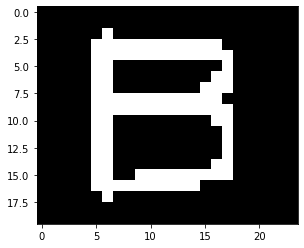

3


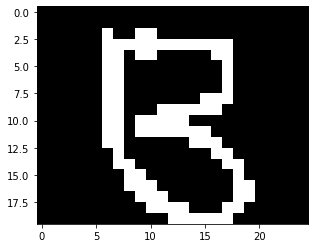

4


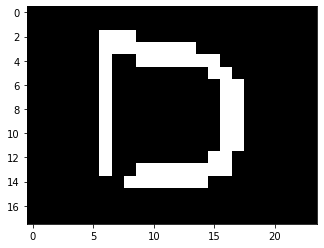

5


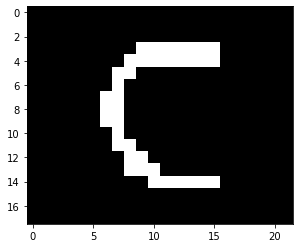

6


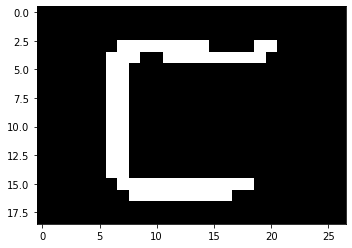

7


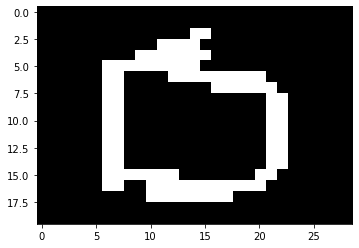

8


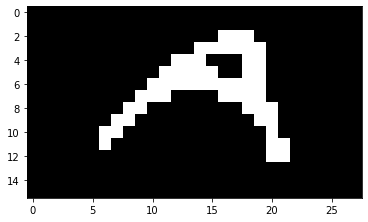

In [42]:
for key in answer_img.keys():
    print(key)
    plt.imshow(answer_img[key], cmap='gray')
    
    plt.show()

0


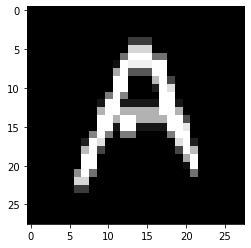

1


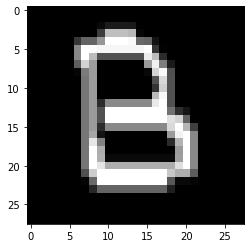

2


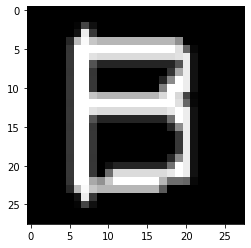

3


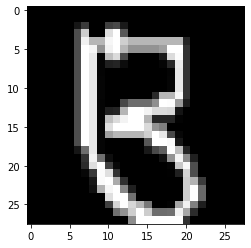

4


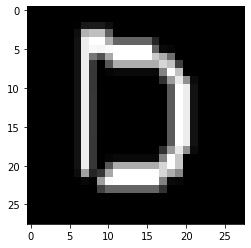

5


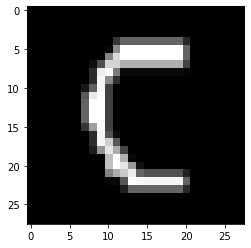

6


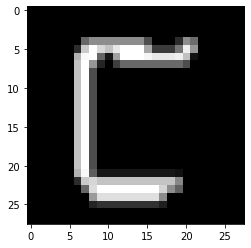

7


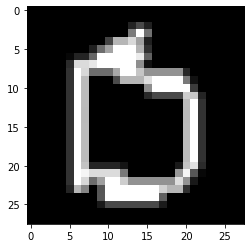

8


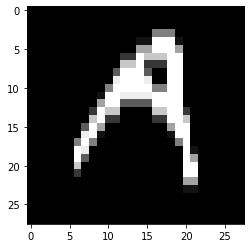

In [43]:
# Creating kernel
kernel = np.ones((2,2), np.uint8)
for key in answer_img.keys():
  print(key)
  answer_img[key] = cv2.resize(answer_img[key], (28, 28))
  
 
  plt.imshow(answer_img[key], cmap='gray')
  plt.show()

In [44]:
model = pickle.load(open('./data/knnpickle_file', 'rb'))

/home/dinhphu/anaconda3/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


0
[0.]


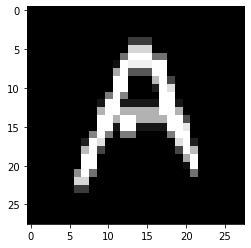

1
[1.]


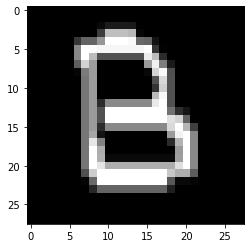

2
[1.]


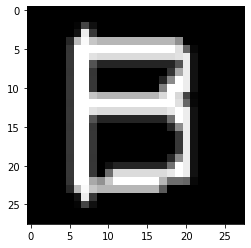

3
[1.]


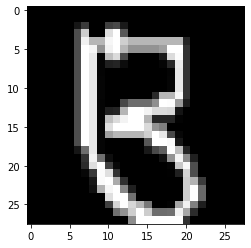

4
[3.]


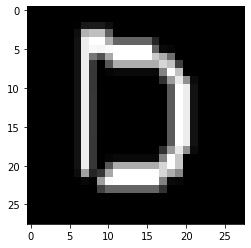

5
[2.]


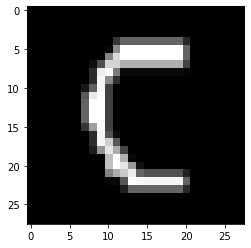

6
[2.]


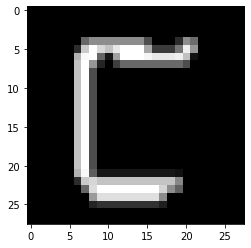

7
[3.]


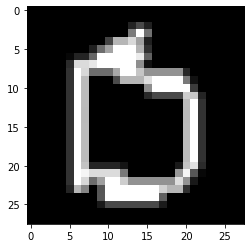

8
[0.]


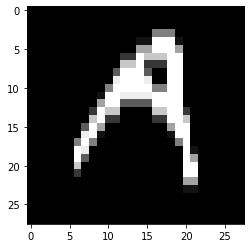

In [45]:
import numpy as np

y_predict = {}

for i in range(0, 50):
    y_predict[i] = 'X'

for key in answer_img.keys():
    print(key)
    res = model.predict(answer_img[key].reshape(-1,784))
    if res == 3.0:
        y_predict[key] = 'D'
    elif res == 2.0:
        y_predict[key] = 'C'
    elif res == 1.0:
        y_predict[key] = 'B'
    else:
        y_predict[key] = 'A'
    print(res)
    plt.imshow(answer_img[key], cmap='gray')
    plt.show()

In [46]:
ans = []
with open('./phieuTracNghiem/answer3.txt', 'r') as f:
    string = f.read()
    for c in string.split(','):
        ans.append(c)
        
print(ans)

['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D', 'B', 'C', 'A', 'D', 'C', 'X', 'D', 'B', 'C', 'X', 'A', 'D', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X']


In [47]:
ans2 = {}
for i in range(0, 50):
    ans2[i] = ans[i]
    
print(ans2)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'A', 5: 'B', 6: 'C', 7: 'D', 8: 'B', 9: 'C', 10: 'A', 11: 'D', 12: 'C', 13: 'X', 14: 'D', 15: 'B', 16: 'C', 17: 'X', 18: 'A', 19: 'D', 20: 'X', 21: 'X', 22: 'X', 23: 'X', 24: 'X', 25: 'X', 26: 'X', 27: 'X', 28: 'X', 29: 'X', 30: 'X', 31: 'X', 32: 'X', 33: 'X', 34: 'X', 35: 'X', 36: 'X', 37: 'X', 38: 'X', 39: 'X', 40: 'X', 41: 'X', 42: 'X', 43: 'X', 44: 'X', 45: 'X', 46: 'X', 47: 'X', 48: 'X', 49: 'X'}


In [48]:
print(y_predict)

{0: 'A', 1: 'B', 2: 'B', 3: 'B', 4: 'D', 5: 'C', 6: 'C', 7: 'D', 8: 'A', 9: 'X', 10: 'X', 11: 'X', 12: 'X', 13: 'X', 14: 'X', 15: 'X', 16: 'X', 17: 'X', 18: 'X', 19: 'X', 20: 'X', 21: 'X', 22: 'X', 23: 'X', 24: 'X', 25: 'X', 26: 'X', 27: 'X', 28: 'X', 29: 'X', 30: 'X', 31: 'X', 32: 'X', 33: 'X', 34: 'X', 35: 'X', 36: 'X', 37: 'X', 38: 'X', 39: 'X', 40: 'X', 41: 'X', 42: 'X', 43: 'X', 44: 'X', 45: 'X', 46: 'X', 47: 'X', 48: 'X', 49: 'X'}


In [49]:
cnt = 0
for i in range(0, 50):
    if ans[i] == y_predict[i]:
        cnt += 1

print(cnt/50 * 100)

72.0
